In [1]:
root="/content/drive/My Drive/Assignment1_BITS_F312_edwinthomas_2018A4PS0696H/"
import io
import sys
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
from mpl_toolkits import mplot3d
from collections import Counter
import math

##Functions for linear regression.
Below are all the functions used by descent linear regression, i.e., questions 1-4 of the assignment

In [2]:
def lin_normalise(X_train,Y_train,X_test,Y_test):
  """
  inputs:
  X_train,Y_train -- normalised training data
  X_test,Y_test -- normaised testing data
  outputs:
  X_train,Y_train -- training data
  X_test,Y_test -- testing data

  NOTE: both the training and testing data are normalised with respect to the mean and std deviation of the training data, because of poor performance in smalle training sets and testing sets
  """
  mean=(np.mean(X_train,axis=0,keepdims=True),np.mean(Y_train,axis=0,keepdims=True))
  std=(np.std(X_train,axis=0,keepdims=True),np.std(Y_train,axis=0,keepdims=True))
  X_train = (X_train-mean[0])/std[0]
  Y_train = (Y_train-mean[1])/std[1]
  X_test = (X_test-mean[0])/std[0]
  Y_test = (Y_test-mean[1])/std[1]
  return X_train,Y_train,X_test,Y_test

In [3]:
def initialise_parameters(data_shape):
  """
  inputs:
  data_shape -- shape of the feature matrix
  outputs:
  weights -- numpy array of randomly initialised weights
  """
  np.random.seed(0)
  weights=np.random.randn(data_shape[1],1)*5
  return weights

In [4]:
def lin_compute_cost(H,Y,reg=None,w=0,lmb=0):
  """
  inputs:
  X -- input feature matrix
  H -- hypotheses made by the model on every training example
  Y-- output matrix
  reg -- type of regularisation
  w -- weights of the model
  lmb -- hyperparameter lambda for the regularisation
  outputs:
  cost -- cost of the iteration
  """
  cost =np.mean(np.square(Y-H))/2
  if reg=="l2":
    cost=cost+lmb*np.square(np.linalg.norm(w))/2
  elif reg=="l1":
    cost = cost + np.linalg.norm(w,ord=1)
  return cost 

In [5]:
def lin_forward_prop(X,weights,Y,reg=None,lmb=0):
  """
  inputs:
  X -- input feature matrix
  weights -- weights of the model
  reg -- type of regularisation
  lmb -- hyperparameter lambda for the regularisation
  Y-- output matrix
  outputs:
  hypotheses -- of hypotheses made by the model on every training example
  cost -- cost of the iteration
  """
  hypotheses=np.dot(X,weights)
  cost=lin_compute_cost(hypotheses,Y,reg,weights,lmb)
  return hypotheses, cost

In [6]:
def lin_back_prop(X_train,hypotheses,Y_train,reg=None,w=0,lmb=0):
  """
  inputs:
  X_train -- input feature matrix of the training set
  hypotheses -- hypotheses made by the model on every training example
  Y-- output matrix of the training set
  reg -- type of regularisation
  w -- weights of the model
  lmb -- hyperparameter lambda for the regularisation
  outputs:
  dW -- derivative of the cost with respect to the weights of the model
  """
  if reg is None:
    dW=np.dot(X_train.T,hypotheses-Y_train)/(Y_train.shape[0])
  elif reg is "l2":
    dW=(np.dot(X_train.T,hypotheses-Y_train)+lmb*w)/(Y_train.shape[0])
  elif reg is "l1":
    dW=(np.dot(X_train.T,hypotheses-Y_train)+lmb*np.sign(w))/(Y_train.shape[0])
  return dW

In [7]:
def update_parameters(weights,dW,learning_rate):
  """
  inputs:
  weights -- current weights of the model
  dW -- derivative of the cost with respect to the weights of the model
  learning_rate -- rate at which the model would learn
  outputs:
  weights -- updated weights of the model
  """
  weights = weights - learning_rate*dW
  return weights

In [8]:
def make_batches(minibatch_size, X_train, Y_train):
  train_data=np.concatenate((X_train, Y_train), axis=1)
  np.random.shuffle(train_data)
  data=train_data[:,0:X_train.shape[1]],train_data[:,X_train.shape[1]:X_train.shape[1]+1]
  minibatches_X=[]
  minibatches_Y=[]
  for i in range(0, train_data.shape[0], minibatch_size):  
    minibatches_X.append(data[0][i:i + minibatch_size])
    minibatches_Y.append(data[1][i:i + minibatch_size])
  return minibatches_X, minibatches_Y

In [9]:
def lin_train(X_train,Y_train,learning_rate, num_epochs, X_test,Y_test, descent="batch", batch_size=None,reg=None,lmb=0):
  """
  inputs:
  X_train,Y_train -- training data
  learning_rate -- rate at which the model would learn
  num_iterations -- number of iterations
  X_test,Y_test -- testing data
  descent -- type of optimisation descent
  batch_size -- size of batch in case of minibatch gradient descent
  reg -- type of regularisation
  lmb -- hyperparameter lambda for the regularisation
  outputs:
  weights -- final weights after training the model
  train_costs -- costs of each iteration
  w_list -- weights after each update of the model
  """
  num_trainingexamples=X_train.shape[0]
  num_testexamples=X_test.shape[0]
  if descent is "stochastic": batch_size=1
  elif descent is "batch": batch_size=num_trainingexamples
  w_list=[]
  weights=initialise_parameters(X_train.shape)
  train_costs=[]
  test_costs=[]
  _,startcost=lin_forward_prop(X_train,weights,Y_train,reg,lmb)
  print("cost before training: " + str(startcost))
  minibatches_X, minibatches_Y = make_batches(batch_size, X_train, Y_train)
  for epoch in range(num_epochs):
    for j in range(int(num_trainingexamples/batch_size)):
      X=minibatches_X[j]
      Y=minibatches_Y[j]
      w_list.append(weights)
      hypotheses,train_cost=lin_forward_prop(X,weights,Y,reg,lmb)
      train_costs.append(train_cost)
      _,test_cost=lin_forward_prop(X_test,weights,Y_test,reg,lmb)
      test_costs.append(test_cost)
      dW=lin_back_prop(X,hypotheses,Y,reg,weights,lmb)
      weights=update_parameters(weights,dW,learning_rate)
    if descent is "batch":
      if (epoch+1)%25==0: print("cost after iteration {}: ".format(epoch+1) + str(train_cost))
    else: print("cost after epoch {}: ".format(epoch+1) + str(train_cost))
  _,f_c=lin_forward_prop(X_train,weights,Y_train)
  _,f_t=lin_forward_prop(X_test,weights,Y_test)
  print("cost after training: ", str(f_c))
  print("test set mean square error after training: ",str(f_t))
  fig = plt.figure()
  fig.suptitle('Learning Curves', fontsize=20)
  plt.xlabel('Number of Iterations', fontsize=14)
  plt.plot(range(len(train_costs)),train_costs, label = 'Training Set Cost', color = "Red")
  plt.plot(range(len(test_costs)),test_costs, label = 'Test Set Mean Square Error',color="Blue")
  plt.legend()
  return weights,train_costs,np.squeeze(np.array(w_list))

##Question 1
Implement the linear regression algorithm to estimate the weight parameters. You can
use batch gradient descent algorithm for the implementation. (a) Plot the cost function vs
 the number of iterations. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf
graph (w= [w0 w1 w2]). (c) Evaluate the mean square error between the actual test output
and predicted test output. Please use the files such as Training feature matrix, training
output vector, test feature matrix, test output vector for this question (Use for or while loop
for the implementation of linear regression).

In [10]:
np.random.seed(0)
train_feature_matrix = pd.read_excel(root+"data/training_feature_matrix.xlsx",header=None)
train_output = pd.read_excel(root+"data/training_output.xlsx",header=None)
test_feature_matrix = pd.read_excel(root+"data/test_feature_matrix.xlsx",header=None)
test_output = pd.read_excel(root+"data/test_output.xlsx",header=None)
print("shape of train_feature_matrix: "+ str(train_feature_matrix.shape))
print("shape of train_output: "+ str(train_output.shape))
print("shape of test_feature_matrix: "+ str(test_feature_matrix.shape))
print("shape of test_output: "+ str(test_output.shape))

shape of train_feature_matrix: (245, 2)
shape of train_output: (245, 1)
shape of test_feature_matrix: (104, 2)
shape of test_output: (104, 1)


In [11]:
"""
Both training and test data are normalised with the mean and standard deviation of the training set.
"""
X_train = train_feature_matrix.values
Y_train = train_output.values
X_test = test_feature_matrix.values
Y_test = test_output.values
X_train,Y_train,X_test,Y_test=lin_normalise(X_train,Y_train,X_test,Y_test)
#dummy feature is added inorder to incorporate bias in as a weight
X_train = np.pad(X_train,[(0,0),(1,0)],mode='constant', constant_values=1)
X_test =  np.pad(X_test,[(0,0),(1,0)],mode='constant', constant_values=1)
print("shape of X_train: "+str(X_train.shape))
print("shape of Y_train: "+str(Y_train.shape))
print("shape of X_test: "+str(X_test.shape))
print("shape of Y_test: "+str(Y_test.shape))

shape of X_train: (245, 3)
shape of Y_train: (245, 1)
shape of X_test: (104, 3)
shape of Y_test: (104, 1)


cost before training: 54.481186443007935
cost after iteration 25: 2.917065510995903
cost after iteration 50: 0.5751094583155488
cost after iteration 75: 0.4684683315256269
cost after iteration 100: 0.46288363814908307
cost after iteration 125: 0.46253692028964183
cost after iteration 150: 0.46251093961675765
cost after training:  0.46251071161729973
test set mean square error after training:  1.2390640631394159


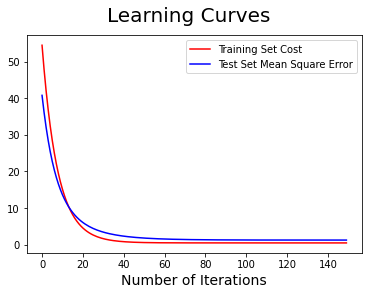

In [12]:
"""
chosen hyperparameters are:
learning rate = 0.06
number of iterations = 150
"""
linreg_weights,linreg_training_costs,linreg_w_list=lin_train(X_train,Y_train,0.06,150,X_test,Y_test)

In [13]:
print("weights after training:\n"+ str(linreg_weights))

weights after training:
[[0.0008216 ]
 [0.04143416]
 [0.26065131]]


In [14]:
w0=np.zeros(100)
w1 = np.arange(-50,50,1)
w2 = np.arange(-50,50,1)
costs=[]
for i in range(100):
  cost=[]
  for j in range(100):
    w=np.array([[0],[w1[i]],[w2[j]]])
    _,c=lin_forward_prop(X_train,w,Y_train)
    cost.append(c)
  costs.append(cost)
J=np.array(costs)+linreg_weights[0]

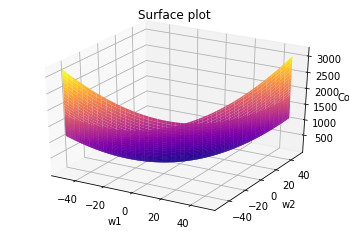

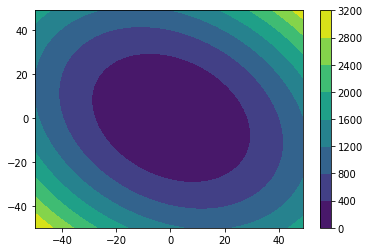

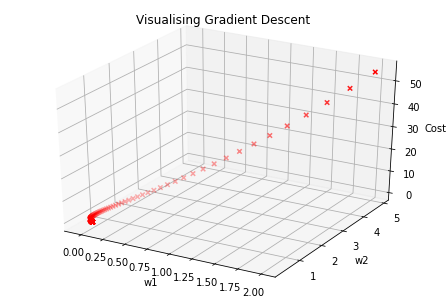

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w1, w2, J,cmap='plasma')
ax.set_title('Surface plot')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
plt.show()
fig = plt.figure()
cp=plt.contourf(w1, w2, J)
plt.colorbar(cp)
ax.set_title('Contour Plot')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
fig = plt.figure()
ax = mplot3d.Axes3D(fig)
ax.scatter3D(linreg_w_list[:,1],linreg_w_list[:,2],linreg_training_costs, color = "Red",marker='x')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Visualising Gradient Descent')
plt.show()

##Question 2
Implement mini-batch and stochastic gradient descent algorithms for the linear
regression problem in question number 1. (a) Plot the cost function vs the number of
iterations. (b) Plot the cost function vs w1 and w2. (c) Evaluate the mean square error
between the actual test output and predicted test output. Please use the same data files as
in question number 1 (Use for or while loop for the implementation).

cost before training: 54.481186443007935
cost after epoch 1: 6.358180101868336
cost after epoch 2: 1.2215650559845663
cost after epoch 3: 0.5784188832767561
cost after epoch 4: 0.51369047950048
cost after epoch 5: 0.516453305951999
cost after epoch 6: 0.5214738990129715
cost after epoch 7: 0.5237201907340954
cost after epoch 8: 0.5244487844996228
cost after epoch 9: 0.5246077329665209
cost after epoch 10: 0.5245979474630124
cost after training:  0.46289856457142026
test set mean square error after training:  1.2432712623707256
weights after minibatch gradient descent: 
 [[0.01708008]
 [0.05162297]
 [0.27716828]]


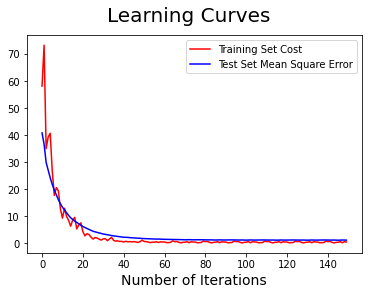

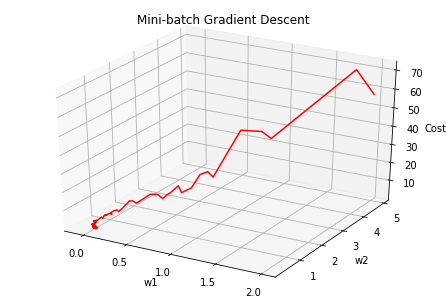

In [16]:
"""
MINIBATCH
chosen hyperparameters are:
learning rate = 0.05
number of epochs = 10
minibatch size = 16
"""
mgd_w,mgd_costs,mgd_w_list=lin_train(X_train,Y_train,0.06,10,X_test,Y_test,descent="minibatch",batch_size=16)
print("weights after minibatch gradient descent: \n",mgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(mgd_w_list[:,1],mgd_w_list[:,2],mgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Mini-batch Gradient Descent')
plt.show()

cost before training: 54.481186443007935
cost after epoch 1: 0.3834281737547408
cost after epoch 2: 0.02953052827731749
cost after epoch 3: 0.018575838028862465
cost after epoch 4: 0.01784490096942154
cost after training:  0.46520729303365776
test set mean square error after training:  1.274458564370004
weights after stochastic gradient descent: 
 [[0.05226499]
 [0.08027212]
 [0.28607094]]


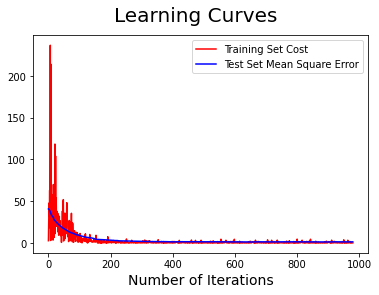

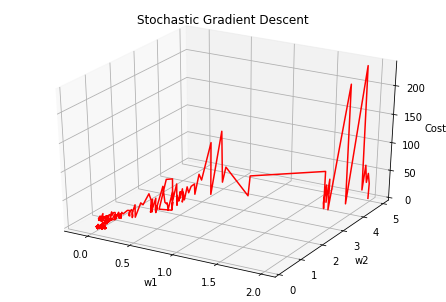

In [17]:
"""
STOCHASTIC
chosen hyperparameters are:
learning rate = 0.01
number of epochs = 4
minibatch size = 1
"""
sgd_w,sgd_costs,sgd_w_list=lin_train(X_train,Y_train,0.01,4,X_test,Y_test,descent="stochastic")
print("weights after stochastic gradient descent: \n",sgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(sgd_w_list[:,1],sgd_w_list[:,2],sgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Stochastic Gradient Descent')
plt.show()


##Question 3
Implement the ridge regression problem by considering batch, mini-batch and stochastic gradient descent algorithms. (a) Plot the cost function vs the number of iterations for all three cases. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph for all three cases. (c) Evaluate the mean square error between the actual test output and predicted test output. Please use the same data files as in question number 1 (Use for or while loop for the implementation).



cost before training: 133.79245854776357
cost after iteration 25: 6.887862081475305
cost after iteration 50: 0.8684032234384691
cost after iteration 75: 0.5478488088055421
cost after iteration 100: 0.5200464647163008
cost after iteration 125: 0.5153395873080358
cost after iteration 150: 0.5141242575348817
cost after training:  0.46250964780117043
test set mean square error after training:  1.2403200228393887
weights after ridge regression: 
 [[0.00077481]
 [0.04169987]
 [0.25893563]]


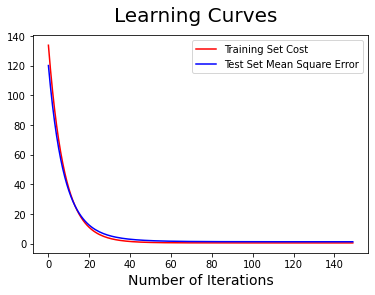

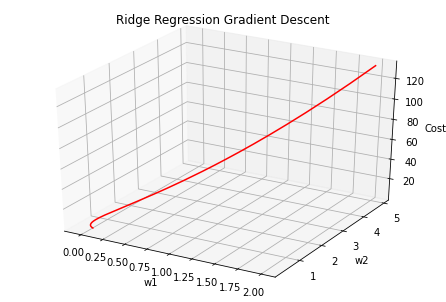

In [18]:
"""
chosen hyperparameters are:
chosen hyperparameters are:
learning rate = 0.06
number of iterations = 150
lambda = 1.5
"""
l2_w,l2_costs,l2_w_list=lin_train(X_train,Y_train,0.06,150,X_test,Y_test,reg="l2",lmb=1.5)
print("weights after ridge regression: \n",l2_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l2_w_list[:,1],l2_w_list[:,2],l2_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Ridge Regression Gradient Descent')
plt.show()

cost before training: 133.79245854776357
cost after epoch 1: 16.611540818098334
cost after epoch 2: 2.598130882178817
cost after epoch 3: 0.8451632402545289
cost after epoch 4: 0.6144810412584693
cost after epoch 5: 0.5822719121533626
cost after epoch 6: 0.5765357825961365
cost after epoch 7: 0.5747393657006052
cost after epoch 8: 0.5738696713736665
cost after epoch 9: 0.5734038986102976
cost after epoch 10: 0.5731590038974812
cost after training:  0.46271408686724375
test set mean square error after training:  1.2619008077919516
weights after minibatch gradient descent: 
 [[0.0162743 ]
 [0.05500646]
 [0.25198177]]


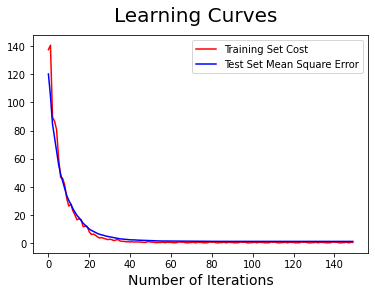

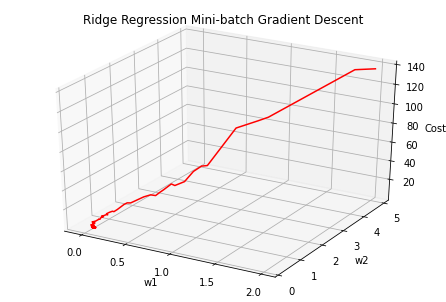

In [19]:
"""
MINIBATCH RIDGE REGRESSION
chosen hyperparameters are:
learning rate = 0.05
number of epochs = 10
minibatch size = 16
lambda = 1.5
"""
l2_mgd_w,l2_mgd_costs,l2_mgd_w_list=lin_train(X_train,Y_train,0.06,10,X_test,Y_test,descent="minibatch",batch_size=16,reg="l2",lmb=1.5)
print("weights after minibatch gradient descent: \n",l2_mgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l2_mgd_w_list[:,1],l2_mgd_w_list[:,2],l2_mgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Ridge Regression Mini-batch Gradient Descent')
plt.show()

cost before training: 186.66663995093398
cost after epoch 1: 0.033114704956843266
cost after epoch 2: 0.03259707180234943
cost after epoch 3: 0.032596991946231724
cost after epoch 4: 0.03259699193328794
cost after training:  0.4797395295487635
test set mean square error after training:  1.4717122821639654
weights after stochastic gradient descent: 
 [[0.03366072]
 [0.05013226]
 [0.0746302 ]]


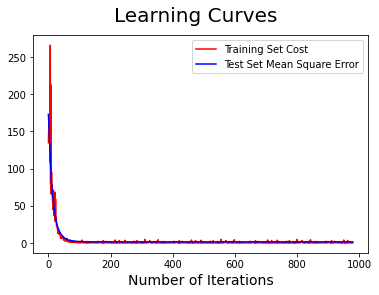

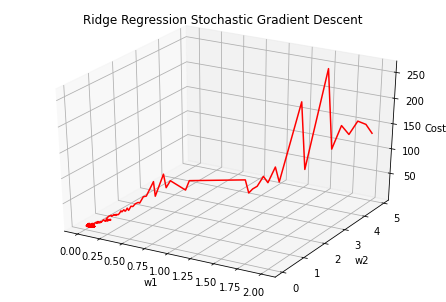

In [20]:
"""
STOCHASTIC RIDGE REGRESSION
chosen hyperparameters are:
learning rate = 0.01
number of epochs = 4
minibatch size = 1
lambda = 1.5
"""
l2_sgd_w,l2_sgd_costs,l2_sgd_w_list=lin_train(X_train,Y_train,0.01,4,X_test,Y_test,descent="stochastic",reg="l2",lmb=2.5)
print("weights after stochastic gradient descent: \n",l2_sgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l2_sgd_w_list[:,1],l2_sgd_w_list[:,2],l2_sgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Ridge Regression Stochastic Gradient Descent')
plt.show()

OBSERVATION:

as the chosen value for the hyperparameter lambda increases the curves smoothen and the fluctuations decrease.
for very high value of lambda, the learning curves and cost feature plot, tends to approach the shape of batch gradient descent. 

##Question 4
Implement Least angle regression to estimate the weight parameters for the feature matrix (X) and the class label vector (y) by considering batch, mini-batch and stochastic gradient descent-based algorithms. (a) Plot the cost function vs the number of iterations for all three cases. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph for all three cases. (c) Evaluate the mean square error between the actual test output and predicted test output. Please use the same data files as in question number 1 (Use for or while loop for the implementation).

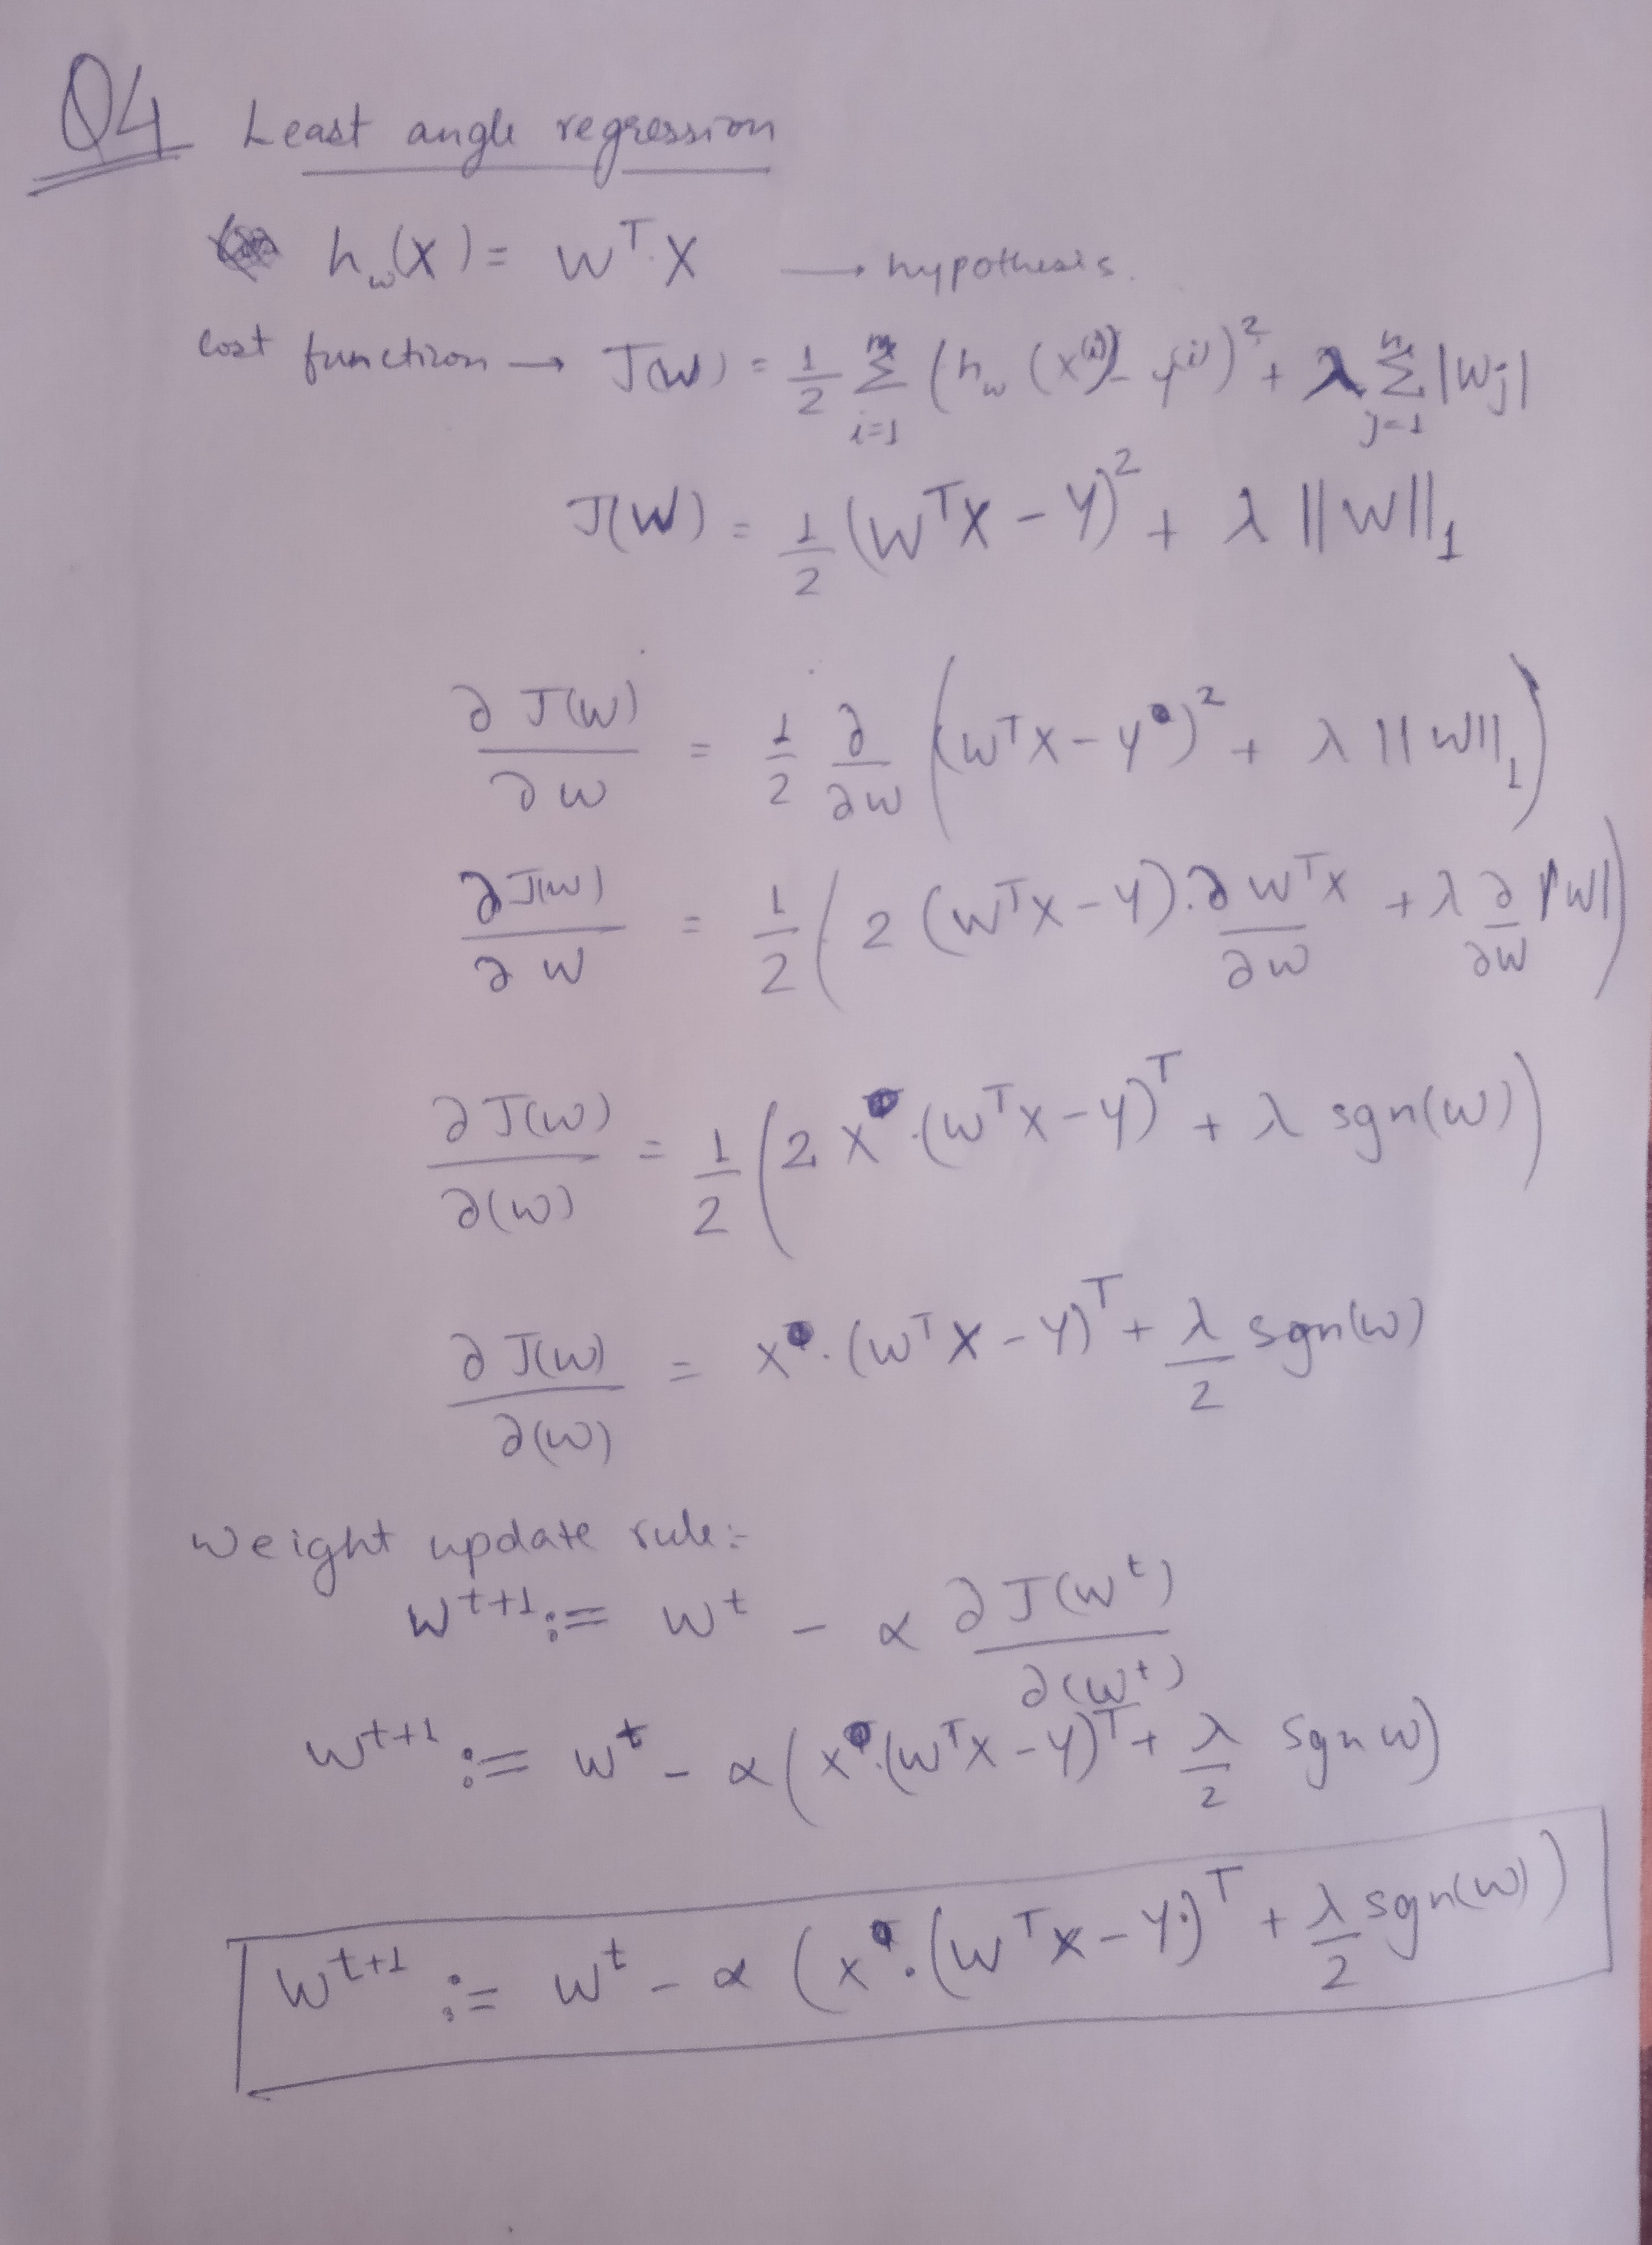

In [21]:
Image(root+'q4_assignment1.jpg')

cost before training: 70.19592413521107
cost after iteration 25: 6.170926435995177
cost after iteration 50: 1.4968967175736432
cost after iteration 75: 0.8687333403380257
cost after iteration 100: 0.7716790767626058
cost after iteration 125: 0.7555953835492846
cost after iteration 150: 0.7552056220060142
cost after training:  0.4625391170234529
test set mean square error after training:  1.2448544353397881
weights after least angle regression: 
 [[-1.86352833e-04]
 [ 3.68017751e-02]
 [ 2.55667247e-01]]


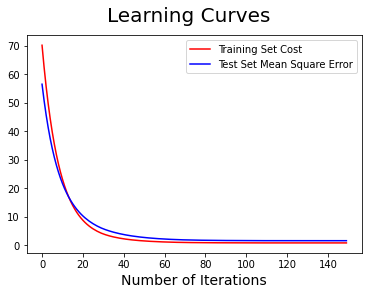

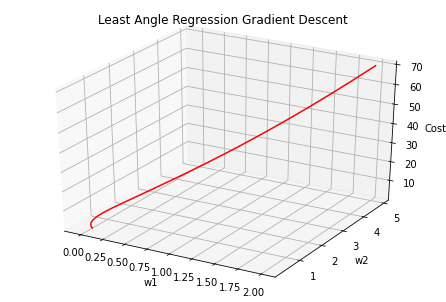

In [22]:
"""
chosen hyperparameters are:
chosen hyperparameters are:
learning rate = 0.06
number of iterations = 150
lambda = 1.5
"""
l1_w,l1_costs,l1_w_list=lin_train(X_train,Y_train,0.06,150,X_test,Y_test,reg="l1",lmb=1.5)
print("weights after least angle regression: \n",l1_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l1_w_list[:,1],l1_w_list[:,2],l1_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Least Angle Regression Gradient Descent')
plt.show()

cost before training: 133.79245854776357
cost after epoch 1: 16.611540818098334
cost after epoch 2: 2.598130882178817
cost after epoch 3: 0.8451632402545289
cost after epoch 4: 0.6144810412584693
cost after epoch 5: 0.5822719121533626
cost after epoch 6: 0.5765357825961365
cost after epoch 7: 0.5747393657006052
cost after epoch 8: 0.5738696713736665
cost after epoch 9: 0.5734038986102976
cost after epoch 10: 0.5731590038974812
cost after training:  0.46271408686724375
test set mean square error after training:  1.2619008077919516
weights after minibatch gradient descent: 
 [[0.0162743 ]
 [0.05500646]
 [0.25198177]]


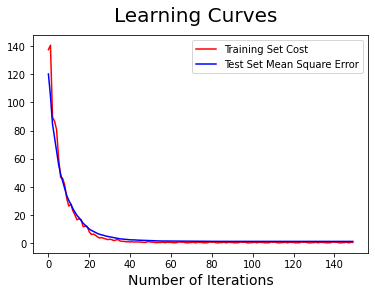

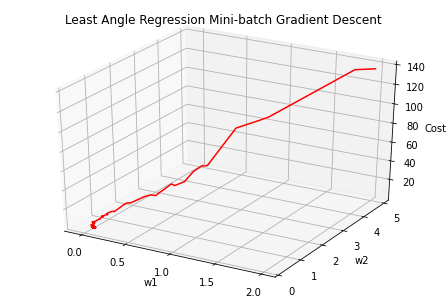

In [23]:
"""
MINIBATCH LEAST ANGLE REGRESSION
chosen hyperparameters are:
learning rate = 0.05
number of epochs = 10
minibatch size = 16
lambda = 1.5
"""
l1_mgd_w,l1_mgd_costs,l1_mgd_w_list=lin_train(X_train,Y_train,0.06,10,X_test,Y_test,descent="minibatch",batch_size=16,reg="l2",lmb=1.5)
print("weights after minibatch gradient descent: \n",l1_mgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l1_mgd_w_list[:,1],l1_mgd_w_list[:,2],l1_mgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Least Angle Regression Mini-batch Gradient Descent')
plt.show()

cost before training: 186.66663995093398
cost after epoch 1: 0.033114704956843266
cost after epoch 2: 0.03259707180234943
cost after epoch 3: 0.032596991946231724
cost after epoch 4: 0.03259699193328794
cost after training:  0.4797395295487635
test set mean square error after training:  1.4717122821639654
weights after stochastic gradient descent: 
 [[0.03366072]
 [0.05013226]
 [0.0746302 ]]


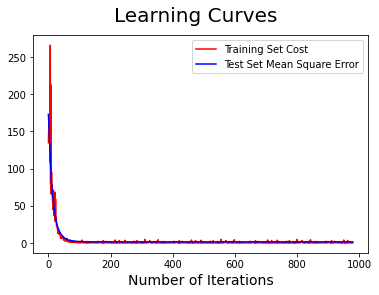

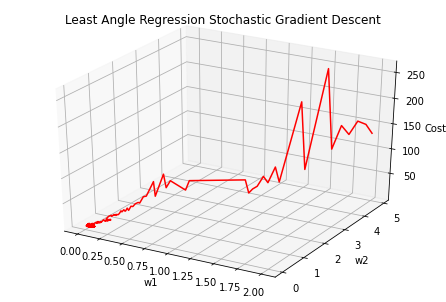

In [24]:
"""
STOCHASTIC LEAST ANGLE REGRESSION
chosen hyperparameters are:
learning rate = 0.01
number of epochs = 4
minibatch size = 1
lambda = 1.5
"""
l1_sgd_w,l1_sgd_costs,l1_sgd_w_list=lin_train(X_train,Y_train,0.01,4,X_test,Y_test,descent="stochastic",reg="l2",lmb=2.5)
print("weights after stochastic gradient descent: \n",l1_sgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l1_sgd_w_list[:,1],l1_sgd_w_list[:,2],l1_sgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Least Angle Regression Stochastic Gradient Descent')
plt.show()

##Question 5
Implement the vectorized linear regression, ridge regression and least angle regression problems to evaluate the weight parameters for question number 1. Compare the weight parameters of vectorization-based methods with the weights obtained using batch, mini-batch and stochastic gradient descent-based algorithms. Please use the same data files as in question number 1. Evaluate the mean square error between the actual test output and predicted test output.

In [25]:
#preprocessing so that the shapes are compatible for vectorised implimentation
X=np.c_[X_train]
Y=np.c_[Y_train]
X_t=np.c_[X_test]
Y_t=np.c_[Y_test]

In [26]:
def regression_normal_eq(X,Y,X_t,Y_t,reg=None,lmb=0):
  """
  inputs:
  X,Y -- training data
  X_t,Y_t -- testing data
  reg -- type of regularisation
  lmb -- hyperparameter lambda for the regularisation
  outputs:
  W -- weights after vectorised optimisation of cost of the model
  cost -- minimised cost
  """
  if reg == None:
    W = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
  elif reg == "l2":
    W=np.dot(np.linalg.inv(np.dot(X.T,X)+lmb*np.identity(X.shape[1])),np.dot(X.T,Y))
  elif reg == "l1":
    temp=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y)-lmb/2),np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y)+lmb/2)
    tempcosts=lin_compute_cost(np.dot(X,temp[0]),Y,reg,temp[0],lmb),lin_compute_cost(np.dot(X,temp[1]),Y,reg,temp[1],lmb)
    W=temp[np.argmin(tempcosts)]
  H=np.dot(X,W)
  cost=lin_compute_cost(H,Y,reg,W,lmb)
  print("cost after optimisation:", cost)
  H_t=np.dot(X_t,W)
  test_error=lin_compute_cost(H_t,Y_t,reg,W,lmb)
  print("mean squared error after optimisation:", test_error)
  return W,cost

In [27]:
neq_w,neq_cost=regression_normal_eq(X,Y,X_t,Y_t)
print("weights after normal equation optimisation:\n", neq_w)

cost after optimisation: 0.4625084117323208
mean squared error after optimisation: 1.2382667502565399
weights after normal equation optimisation:
 [[-2.00967282e-16]
 [ 4.30528649e-02]
 [ 2.58988001e-01]]


In [28]:
l2_neq_w,l2_neq_cost=regression_normal_eq(X,Y,X_t,Y_t,reg="l2",lmb=1.5)
print("weights after ridge regression normal equation optimisation:\n", l2_neq_w)

cost after optimisation: 0.5135885824875226
mean squared error after optimisation: 1.2906497725431627
weights after ridge regression normal equation optimisation:
 [[-1.98156642e-16]
 [ 4.32290064e-02]
 [ 2.57364475e-01]]


In [29]:
l1_neq_w,l1_neq_cost=regression_normal_eq(X,Y,X_t,Y_t,reg="l1",lmb=1.5)
print("weights after least angle regression normal equation optimisation:\n", l1_neq_w)

cost after optimisation: 0.7628074690775897
mean squared error after optimisation: 1.5375413440400876
weights after least angle regression normal equation optimisation:
 [[-0.00306122]
 [ 0.04064532]
 [ 0.25658046]]


##Question 6 
Implement K-means clustering based unsupervised learning algorithm for the dataset(“data2.xlsx”). Plot the estimated class labels vs features. Use the number of clusters as K=3.

In [30]:
data2 = np.array(pd.read_excel(root+"data/data2.xlsx",header=None))
data2.shape

(150, 4)

In [31]:
def calculate_distance(start,end):
  dist=np.sum((end-start)**2,axis=1)
  dist=np.sqrt(dist)
  return dist

In [32]:
def project_to_2d(data,del_col=None):
  if del_col is None:
    dev=np.std(data,axis=0)
    del_col=np.argmax(dev)
  X=data[:,del_col]
  dist_cols=np.delete(data,del_col,axis=1)
  orig=np.zeros((data.shape[0],data.shape[1]-1))
  Y=calculate_distance(orig,dist_cols)
  projection=np.vstack((X, Y)).T
  return projection, del_col

In [33]:
def reset_clusters(data,clusters,cache=None,iter=0):
  k=len(clusters)
  k_means=[]
  truth=[True]
  for i in range(k):
    k_means.append(np.mean(clusters[i],axis=0,keepdims=True)) 
    if cache!=None: truth.append(calculate_distance(k_means[i],cache[i])<=0.00001)
  if cache!=None and all(truth): return clusters, iter, k_means
  else:
    new_clusters=[]
    for i in range(k):
      new_clusters.append([])
    centre_dists=[]
    for mean in k_means:
      centre_dists.append(calculate_distance(mean,data))
    centre_dists=np.array(centre_dists)
    nearest_mean=np.argmin(centre_dists,axis=0)
    for i in range(nearest_mean.shape[0]):
      new_clusters[nearest_mean[i]].append(data[i])
    return reset_clusters(data,new_clusters,k_means,iter+1)

In [34]:
def k_means_cluster(k,data):
  np.random.seed(0)
  pr,del_col=project_to_2d(data2)
  np.random.shuffle(data)
  temp_clusters=np.array_split(data,k,axis=0)
  clusters,iter,centers=reset_clusters(data,temp_clusters)
  print("clustered after {} iterations".format(iter))
  fig,axs = plt.subplots(1,data.shape[1])
  fig.set_figheight(5)
  fig.set_figwidth(28)
  for i in range(data.shape[1]):
    for j in range(k):
      axs[i].scatter(x = np.array(clusters[j])[:,i],y=[j]*len(clusters[j]))
      axs[i].set_title('Feature '+str(i+1))
      plt.ylabel('Class')
  fig, axs = plt.subplots(1,2)
  fig.set_figheight(5)
  fig.set_figwidth(14)
  fig.suptitle('2D projection of data', fontsize=20)
  axs[0].scatter(pr[:,0],pr[:,1], label = 'unclustered data')
  for i in range(k):
    name="cluster "+ str(i+1)
    pr,_=project_to_2d(np.array(clusters[i]),del_col)
    axs[1].scatter(pr[:,0],pr[:,1], label = name)
  cr,_=project_to_2d(np.squeeze(np.array(centers)),del_col)
  axs[1].scatter(cr[:,0],cr[:,1], label = "centers", color="red",marker="X",s=160)
  plt.legend(loc='best')
  return clusters,centers

clustered after 12 iterations


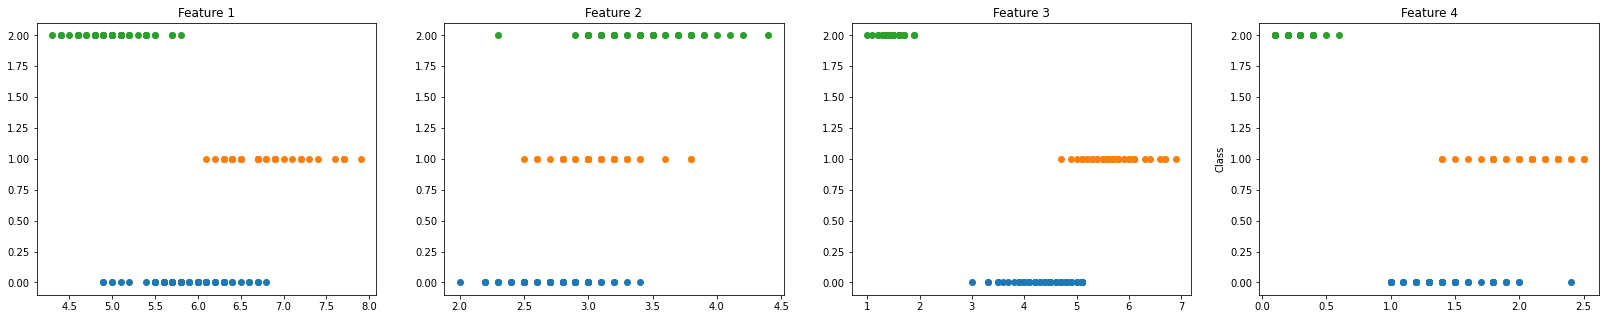

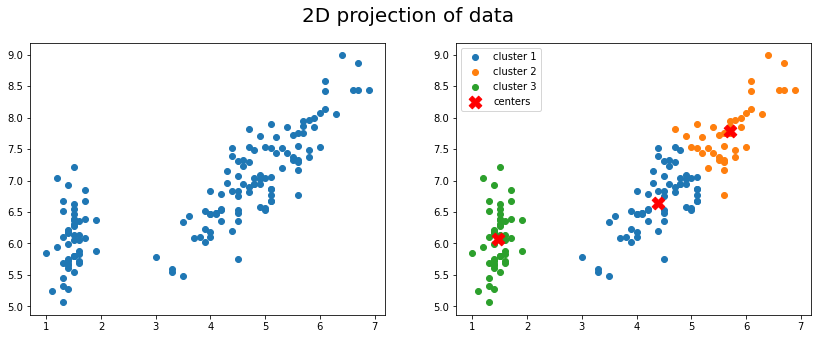

In [35]:
ans,cent=k_means_cluster(3,data2)

##Question 7
Implement the logistic regression algorithm for the binary classification using the dataset (“data3.xlsx”). Divide the dataset into training and testing using hold-out cross-validation technique with 60 % of instances as training and the remaining 40% as testing. Evaluate the accuracy, sensitivity and specificity values for the binary classifier.

In [36]:
np.random.seed(0)
data3= np.array(pd.read_excel(root+"data/data3.xlsx",header=None))
data3.shape

(100, 5)

In [37]:
def log_normalise(X_train,X_test):
  mean=np.mean(X_train,axis=1,keepdims=True)
  std=np.std(X_train,axis=1,keepdims=True)
  normalised_train=(X_train-mean)/std
  normalised_test=(X_test-mean)/std
  return normalised_train,normalised_test

In [38]:
def holdout_cross_validation(data,train_fraction):
  np.random.seed(1)
  np.random.shuffle(data)
  train,test=data[0:int(train_fraction*len(data))],data[int(train_fraction*len(data)):len(data)]
  return train,test

In [39]:
train,test=holdout_cross_validation(data3,0.6)
X_train=np.delete(train,4,axis=1).T
Y_train=np.delete(train,range(4),axis=1).T - 1
X_test=np.delete(test,4,axis=1).T
Y_test=np.delete(test,range(4),axis=1).T - 1
X_train,X_test=log_normalise(X_train,X_test)
X_train = np.pad(X_train,[(1,0),(0,0)],mode='constant', constant_values=1) #Dummy feature added
X_test = np.pad(X_test,[(1,0),(0,0)],mode='constant', constant_values=1) #Dummy feature added
print("shape of X_train: "+str(X_train.shape))
print("shape of Y_train: "+str(Y_train.shape))
print("shape of X_test: "+str(X_test.shape))
print("shape of Y_test: "+str(Y_test.shape))

shape of X_train: (5, 60)
shape of Y_train: (1, 60)
shape of X_test: (5, 40)
shape of Y_test: (1, 40)


In [40]:
def log_initialise_parameters(data_shape):
  """
  inputs:
  data_shape -- shape of the feature matrix
  outputs:
  weights -- numpy array of randomly initialised weights
  """
  np.random.seed(1)
  weights=np.random.randn(data_shape[0],1)*5
  return weights

In [41]:
def log_compute_cost(hypotheses,Y):
  losses=(-1)*(Y*np.log(hypotheses+0.0000001)+(1-Y)*np.log(1-hypotheses+0.0000001))
  cost = np.mean(losses)
  return cost

In [42]:
def sigmoid(Z):
  return np.divide(1,(1+np.exp(-Z)))

In [43]:
def log_forward_prop(X,W):
  """
  inputs:
  X -- input feature matrix
  weights -- weights of the model
  Y-- output matrix
  outputs:
  hypotheses -- python list of hypotheses made by the model on every training example
  """
  Z=np.dot(W.T,X)
  hypotheses=sigmoid(Z)
  return hypotheses

In [44]:
def log_compute_accuracy(H,Y):
  err=np.mean(np.abs(Y-H))
  acc=1-err
  return acc

In [45]:
def log_back_prop(X,H,Y):
  dW=np.dot(X,(H-Y).T)/Y.shape[1]
  return dW

In [46]:
def update_parameters(W,dW,learning_rate):
  W=W-learning_rate*dW
  return W

In [47]:
def log_train(X_train,Y_train,learning_rate,num_iterations,X_test,Y_test,name='Learning Curves'):
  """
  inputs:
  X_train,Y_train -- training data
  learning_rate -- rate at which the model would learn
  num_iterations -- number of iterations
  X_test,Y_test -- testing data
  outputs:
  weights -- final weights after training the model
  train_costs -- costs of each iteration
  w_list -- weights after each update of the model
  """
  num_trainingexamples=X_train.shape[0]
  num_testexamples=X_test.shape[0]
  w_list=[]
  weights=log_initialise_parameters(X_train.shape)
  train_costs=[]
  train_accs=[]
  test_costs=[]
  test_accs=[]
  for iter in range(num_iterations):
    w_list.append(weights)
    hypotheses=log_forward_prop(X_train,weights)
    train_accs.append(log_compute_accuracy(hypotheses,Y_train))
    train_costs.append(log_compute_cost(hypotheses,Y_train))
    if X_test is not None:
      test_h=log_forward_prop(X_test,weights)
      test_accs.append(log_compute_accuracy(test_h,Y_test))
      test_costs.append(log_compute_cost(test_h,Y_test))
    dW=log_back_prop(X_train,hypotheses,Y_train)
    weights=update_parameters(weights,dW,learning_rate)
    if iter==0: print("cost before training: " + str(train_costs[0]))
    if (iter+1)%250==0: print("cost after iteration {}: ".format(iter+1) + str(train_costs[-1]))
  print("cost after training: " + str(train_costs[-1]))
  if X_test is not None:
    print("test accuracy after training: {}%".format(str(100*test_accs[-1])))
    fig = plt.figure()
    fig.suptitle(name, fontsize=20)
    plt.xlabel('Number of Iterations', fontsize=14)
    plt.plot(range(0,num_iterations),train_costs, label = 'Training Set Cost')
    plt.plot(range(0,num_iterations),test_costs, label = 'Test Set Cost')
    plt.plot(range(0,num_iterations),train_accs, label = 'Training Set Accuracy')
    plt.plot(range(0,num_iterations),test_accs, label = 'Test Set Accuracy')
    plt.legend(loc='best')
    plt.show()
  return weights,train_costs,np.squeeze(np.array(w_list))

cost before training: 4.464255231584306
cost after iteration 250: 0.07263326415872846
cost after iteration 500: 0.014861656541071503
cost after training: 0.014861656541071503
test accuracy after training: 99.9468912954779%


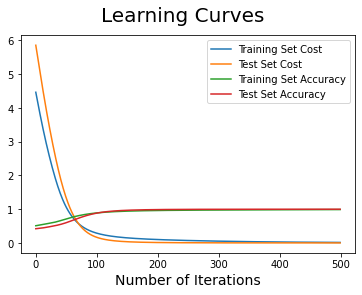

weights after training: 
 [[ 3.93865633]
 [ 1.35518151]
 [-3.35610734]
 [-0.89766114]
 [ 8.35727341]]


In [48]:
"""
chosen hyperparameters are:
learning rate = 0.1
number of iterations = 500
"""
log_w,log_train_costs,log_ws=log_train(X_train,Y_train,0.1,500,X_test,Y_test)
print("weights after training: \n",log_w)

In [49]:
test=np.vstack((X_test,Y_test)).T
positives=test[np.where(test.T[-1]==1.)].T
negatives=test[np.where(test.T[-1]==0.)].T
h_p=log_forward_prop(np.delete(positives.T,-1,axis=1).T,log_w)
h_n=log_forward_prop(np.delete(negatives.T,-1,axis=1).T,log_w)
true_positives=h_p[np.where(h_p>0.5)]
false_negatives=h_p[np.where(h_p<=0.5)]
true_negatives=h_n[np.where(h_n<=0.5)]
false_positives=h_n[np.where(h_n>0.5)]
sensitivity=len(true_positives)/(len(true_positives)+len(false_negatives))
speceficity=len(true_negatives)/(len(true_negatives)+len(false_positives))
print("sensitivity of the binary classifier is:", sensitivity)
print("speceficity of the binary classifier is:", speceficity)

sensitivity of the binary classifier is: 1.0
speceficity of the binary classifier is: 1.0


##Question 8
Implement the multiclass logistic regression algorithm using both “One VS All” and “One VS One” multiclass coding techniques. Evaluate the performance of the multiclass classifier using individual class accuracy and overall accuracy measures. Use the hold-out cross-validation approach (60% training and 40% testing) for the selection of training and test instances. (Please use the dataset “data4.xlsx”)

In [50]:
np.random.seed(0)
data4= np.array(pd.read_excel(root+"data/data4.xlsx",header=None))
data4.shape

(150, 8)

In [51]:
np.random.shuffle(data4)
train,test=holdout_cross_validation(data4,0.6)
X_train=np.delete(train,7,axis=1).T
Y_train=np.delete(train,range(7),axis=1).T - 1
X_test=np.delete(test,7,axis=1).T
Y_test=np.delete(test,range(7),axis=1).T - 1
X_train,X_test=log_normalise(X_train,X_test)
X_train = np.pad(X_train,[(1,0),(0,0)],mode='constant', constant_values=1) #Dummy feature added
X_test = np.pad(X_test,[(1,0),(0,0)],mode='constant', constant_values=1) #Dummy feature added
print("shape of X_train: "+str(X_train.shape))
print("shape of Y_train: "+str(Y_train.shape))
print("shape of X_test: "+str(X_test.shape))
print("shape of Y_test: "+str(Y_test.shape))

shape of X_train: (8, 90)
shape of Y_train: (1, 90)
shape of X_test: (8, 60)
shape of Y_test: (1, 60)


In [52]:
def multiclass_logistic_regression(X_train,Y_train,learning_rate,num_iterations,X_test,Y_test,algotype="1 vs all"):
  num_classes=int(np.max(Y_train)+1)
  y_train_one_hot=np.eye(num_classes)[Y_train.astype(int).T].T
  y_test_one_hot=np.eye(num_classes)[Y_test.astype(int).T].T
  if algotype == "1 vs all":
    w_models=[]
    cost_models=[]
    y_train_models=[]
    y_test_models=[]
    h_test_models=[]
    print("model wise accuracies")
    for i in range(num_classes):
      print("MODEL "+ str(i+1) )
      y_train_models.append(y_train_one_hot[i])
      y_test_models.append(y_test_one_hot[i])
      w,costs,_=log_train(X_train,y_train_models[i],learning_rate,num_iterations,X_test,y_test_models[i],name='model'+str(i+1));
      w_models.append(w)
      cost_models.append(costs[-1])
      h_test_models.append(log_forward_prop(X_test,w_models[i]))
    h_test_classifier=np.reshape(np.argmax(np.squeeze(np.array(h_test_models)),axis=0),Y_test.shape)
  elif algotype == "1 vs 1":
    tr=np.vstack((X_train,np.squeeze(y_train_one_hot),Y_train))
    te=np.vstack((X_test,np.squeeze(y_test_one_hot),Y_test))
    w_models={}
    cost_models={}
    x_train_models={}
    x_test_models={}
    y_train_models={}
    y_test_models={}
    h_test_models={}
    print("model wise accuracies")
    for i in range(num_classes):
      for j in range(num_classes):
        if i<j:
          print('MODEL '+str((i+1,j+1)))
          temptr=tr.T[np.all((tr[-1].reshape(Y_train.shape).T == i)+(tr[-1].reshape(Y_train.shape).T == j),axis=1)].T
          tempte=te.T[np.all((te[-1].reshape(Y_test.shape).T == i)+(te[-1].reshape(Y_test.shape).T == j),axis=1)].T
          x_train_models[(i,j)]=temptr[:X_train.shape[0]]
          y_train_models[(i,j)]=temptr[X_train.shape[0]+i].reshape((1,temptr.shape[1]))
          x_test_models[(i,j)]=tempte[:X_test.shape[0]]
          y_test_models[(i,j)]=tempte[X_test.shape[0]+i].reshape((1,tempte.shape[1]))
          w_models[(i,j)],_,_=log_train(x_train_models[(i,j)],y_train_models[(i,j)],learning_rate,num_iterations,x_test_models[(i,j)],y_test_models[(i,j)],name='model '+str((i+1,j+1)))
          h_test_models[(i,j)]=log_forward_prop(X_test,w_models[(i,j)])
        elif i>j:
          h_test_models[(i,j)]=1-h_test_models[(j,i)]
    polls=[]
    for i in range(num_classes):
      sumtemp=0
      for j in range(num_classes):
        if i != j: sumtemp=sumtemp+h_test_models[(i,j)]
      polls.append(np.squeeze(sumtemp))
    h_test_classifier=np.reshape(np.argmax(polls,axis=0),Y_test.shape)
  acc=log_compute_accuracy(h_test_classifier,Y_test)
  print("overall accuracy of the {} multi class classifier is  {}%".format(algotype,acc*100))
  return w_models, acc

model wise accuracies
MODEL 1
cost before training: 1.914980982913892
cost after iteration 250: 0.022355721669708666
cost after iteration 500: 0.008689192426329383
cost after training: 0.008689192426329383
test accuracy after training: 93.19224135689971%


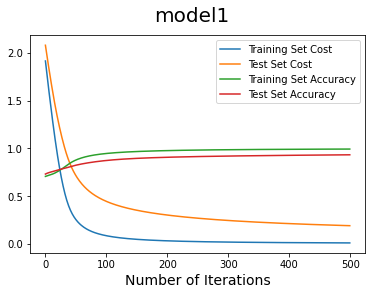

MODEL 2
cost before training: 5.532740793264143
cost after iteration 250: 0.28067095253045315
cost after iteration 500: 0.25547212457520363
cost after training: 0.25547212457520363
test accuracy after training: 83.55969921318821%


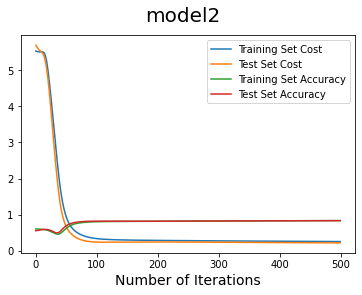

MODEL 3
cost before training: 10.89453585925153
cost after iteration 250: 0.1297453238544348
cost after iteration 500: 0.09965383678162519
cost after training: 0.09965383678162519
test accuracy after training: 90.57383551997944%


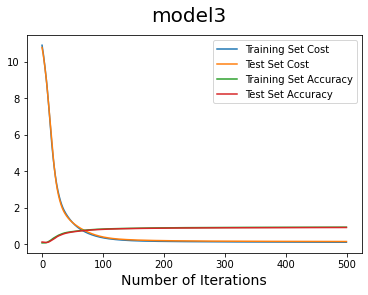

overall accuracy of the 1 vs all multi class classifier is  91.66666666666666%


In [53]:
ova_model_weights,ova_overall_accuracy=multiclass_logistic_regression(X_train,Y_train,0.3,500,X_test,Y_test,algotype="1 vs all")

model wise accuracies
MODEL (1, 2)
cost before training: 2.8773685302274905
cost after iteration 250: 0.01903667346464049
cost after iteration 500: 0.007820577294049278
cost after training: 0.007820577294049278
test accuracy after training: 91.74016308748271%


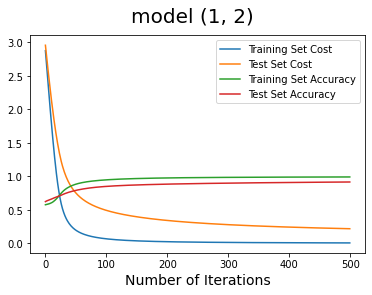

MODEL (1, 3)
cost before training: 0.08807920498817792
cost after iteration 250: 0.005505584121557308
cost after iteration 500: 0.002214376697728189
cost after training: 0.002214376697728189
test accuracy after training: 99.93829679230433%


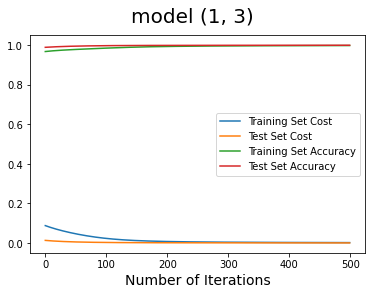

MODEL (2, 3)
cost before training: 0.24009850994224458
cost after iteration 250: 0.07895068682847632
cost after iteration 500: 0.06925327189757338
cost after training: 0.06925327189757338
test accuracy after training: 90.72504170083663%


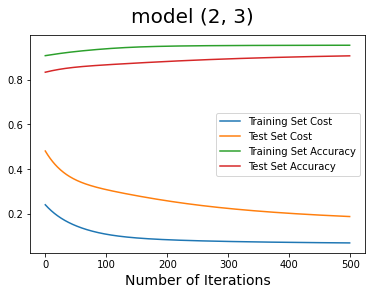

overall accuracy of the 1 vs 1 multi class classifier is  90.0%


In [54]:
ovo_model_weights,ovo_overall_accuracy=multiclass_logistic_regression(X_train,Y_train,0.3,500,X_test,Y_test,algotype="1 vs 1")

##Question 9
Evaluate the performance of multiclass logistic regression classifier using 5-fold cross-validation approach. Evaluate the individual class accuracy and overall accuracy measures for the multiclass classifier along each fold. (Please use the dataset “data4.xlsx”)

In [55]:
def make_k_folds(k,data):
  np.random.seed(0)
  np.random.shuffle(data)
  groups=np.array_split(data,k,axis=0)
  folds=[]
  for i in range(k):
    g=groups.copy()
    te=g.pop(i)
    tr=np.vstack(g)
    folds.append([tr,te])
  return folds

In [56]:
folds=make_k_folds(5,data4)
X_trains=[]
Y_trains=[]
X_tests=[]
Y_tests=[]
for i in range(5):
  train,test=folds[i]
  X_trains.append(np.delete(train,7,axis=1).T)
  Y_trains.append(np.delete(train,range(7),axis=1).T - 1)
  X_tests.append(np.delete(test,7,axis=1).T)
  Y_tests.append(np.delete(test,range(7),axis=1).T - 1)
  X_trains[i],X_tests[i]=log_normalise(X_trains[i],X_tests[i])
  X_trains[i] = np.pad(X_trains[i],[(1,0),(0,0)],mode='constant', constant_values=1) #Dummy feature added
  X_tests[i] = np.pad(X_tests[i],[(1,0),(0,0)],mode='constant', constant_values=1) #Dummy feature added
print("shape of all 5 X_trains: "+str(X_trains[0].shape))
print("shape of all 5 Y_trains: "+str(Y_trains[0].shape))
print("shape of all 5 X_tests: "+str(X_tests[0].shape))
print("shape of all 5 Y_tests: "+str(Y_tests[0].shape))

shape of all 5 X_trains: (8, 120)
shape of all 5 Y_trains: (1, 120)
shape of all 5 X_tests: (8, 30)
shape of all 5 Y_tests: (1, 30)


model wise accuracies
MODEL 1
cost before training: 2.2630118025524713
cost after iteration 250: 0.061808703737762614
cost after iteration 500: 0.016291698371740094
cost after training: 0.016291698371740094
test accuracy after training: 96.46771434539386%


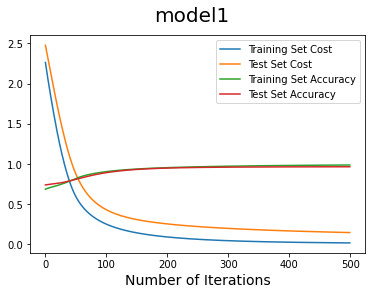

MODEL 2
cost before training: 5.079775607349314
cost after iteration 250: 0.2943990317920459
cost after iteration 500: 0.25946611899638616
cost after training: 0.25946611899638616
test accuracy after training: 88.81914870566375%


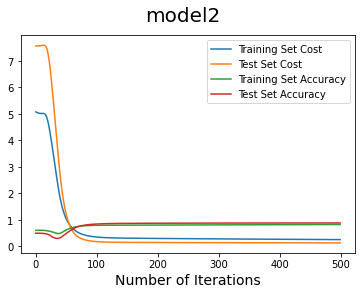

MODEL 3
cost before training: 10.536072538564147
cost after iteration 250: 0.1439828182363578
cost after iteration 500: 0.11514205489160931
cost after training: 0.11514205489160931
test accuracy after training: 95.99443336656981%


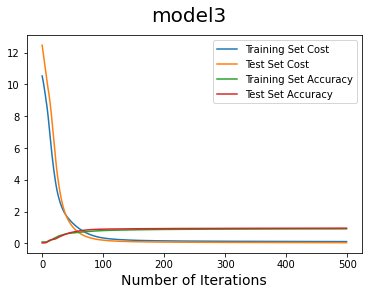

overall accuracy of the 1 vs all multi class classifier is  96.66666666666667%


In [57]:
"""
FOLD 1
"""
f1_ova_model_weights,f1_ova_overall_accuracy=multiclass_logistic_regression(X_trains[0],Y_trains[0],0.3,500,X_tests[0],Y_tests[0],algotype="1 vs all")

model wise accuracies
MODEL 1
cost before training: 1.8008742500821948
cost after iteration 250: 0.07177901997142655
cost after iteration 500: 0.02851457929056211
cost after training: 0.02851457929056211
test accuracy after training: 99.84570826070484%


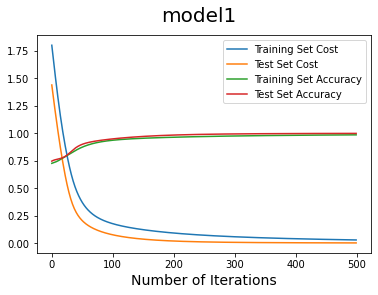

MODEL 2
cost before training: 5.908458128608431
cost after iteration 250: 0.2532865990357745
cost after iteration 500: 0.22829518077169858
cost after training: 0.22829518077169858
test accuracy after training: 82.09483036365671%


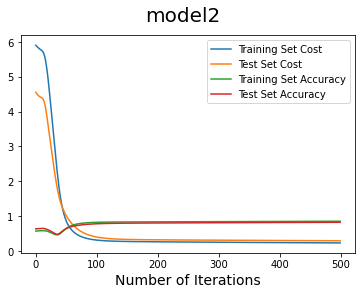

MODEL 3
cost before training: 11.001060903939276
cost after iteration 250: 0.12944889997738646
cost after iteration 500: 0.09663591696333113
cost after training: 0.09663591696333113
test accuracy after training: 88.49515928004621%


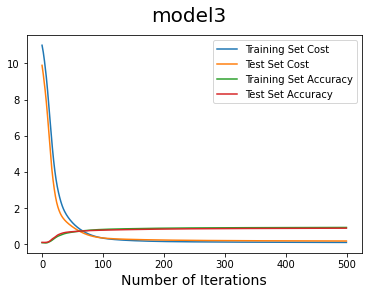

overall accuracy of the 1 vs all multi class classifier is  96.66666666666667%


In [58]:
"""
FOLD 2
"""
f2_ova_model_weights,f2_ova_overall_accuracy=multiclass_logistic_regression(X_trains[1],Y_trains[1],0.3,500,X_tests[1],Y_tests[1],algotype="1 vs all")

model wise accuracies
MODEL 1
cost before training: 1.9365334340607834
cost after iteration 250: 0.08493494945433236
cost after iteration 500: 0.03682729636690918
cost after training: 0.03682729636690918
test accuracy after training: 99.31872109511023%


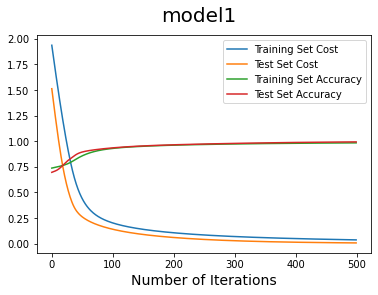

MODEL 2
cost before training: 5.556768172602244
cost after iteration 250: 0.26681802658433823
cost after iteration 500: 0.24315131135269455
cost after training: 0.24315131135269455
test accuracy after training: 84.91693818839231%


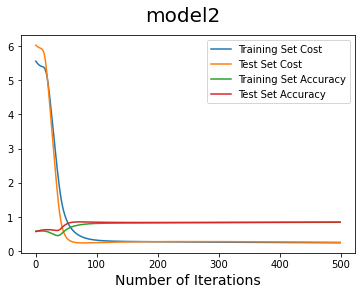

MODEL 3
cost before training: 10.814815204606228
cost after iteration 250: 0.1341789388984979
cost after iteration 500: 0.10039123462538307
cost after training: 0.10039123462538307
test accuracy after training: 91.2266354848513%


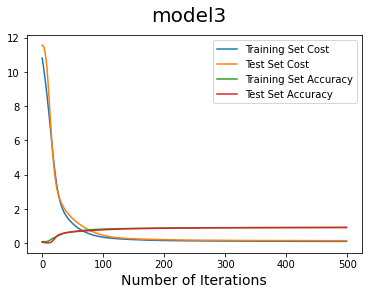

overall accuracy of the 1 vs all multi class classifier is  93.33333333333333%


In [59]:
"""
FOLD 3
"""
f3_ova_model_weights,f3_ova_overall_accuracy=multiclass_logistic_regression(X_trains[2],Y_trains[2],0.3,500,X_tests[2],Y_tests[2],algotype="1 vs all")

model wise accuracies
MODEL 1
cost before training: 1.4150525870171318
cost after iteration 250: 0.06749938394898557
cost after iteration 500: 0.02956457934276769
cost after training: 0.02956457934276769
test accuracy after training: 98.86689717264188%


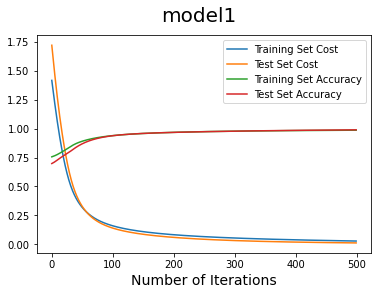

MODEL 2
cost before training: 6.305589660016198
cost after iteration 250: 0.21618308006706313
cost after iteration 500: 0.2007131150234588
cost after training: 0.2007131150234588
test accuracy after training: 72.60900020650837%


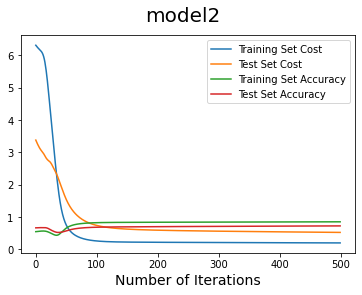

MODEL 3
cost before training: 11.150736074119623
cost after iteration 250: 0.15240854469307724
cost after iteration 500: 0.11374717631271648
cost after training: 0.11374717631271648
test accuracy after training: 88.38963666670587%


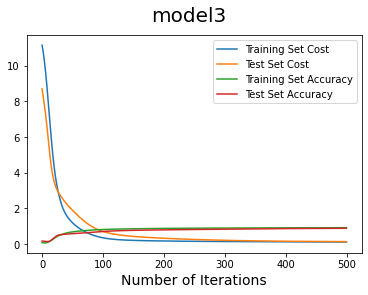

overall accuracy of the 1 vs all multi class classifier is  93.33333333333333%


In [60]:
"""
FOLD 4
"""
f4_ova_model_weights,f4_ova_overall_accuracy=multiclass_logistic_regression(X_trains[3],Y_trains[3],0.3,500,X_tests[3],Y_tests[3],algotype="1 vs all")

model wise accuracies
MODEL 1
cost before training: 2.145829537187638
cost after iteration 250: 0.07862884956066735
cost after iteration 500: 0.03215916420420399
cost after training: 0.03215916420420399
test accuracy after training: 97.33643416829113%


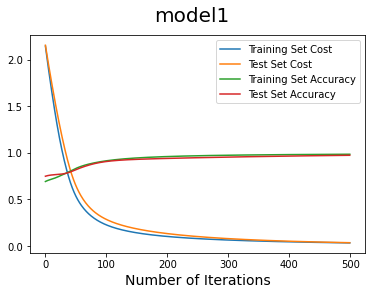

MODEL 2
cost before training: 5.296458246140577
cost after iteration 250: 0.2754069062275052
cost after iteration 500: 0.24447540206484242
cost after training: 0.24447540206484242
test accuracy after training: 85.7269343429453%


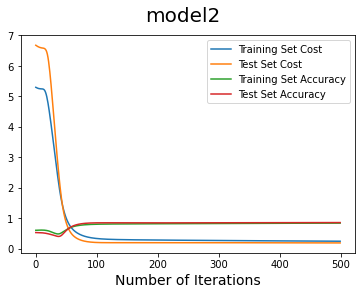

MODEL 3
cost before training: 10.717606499307504
cost after iteration 250: 0.13194999273436267
cost after iteration 500: 0.09918178957912215
cost after training: 0.09918178957912215
test accuracy after training: 92.22761978884739%


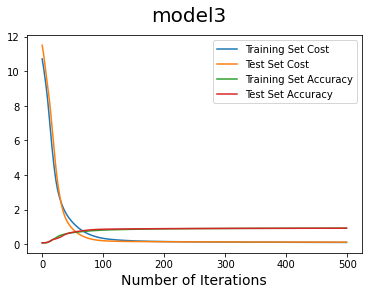

overall accuracy of the 1 vs all multi class classifier is  93.33333333333333%


In [61]:
"""
FOLD 5
"""
f5_ova_model_weights,f5_ova_overall_accuracy=multiclass_logistic_regression(X_trains[4],Y_trains[4],0.3,500,X_tests[4],Y_tests[4],algotype="1 vs all")

##Question 10 
Use the likelihood ratio test (LRT) for the binary classification using the dataset (“data3.xlsx”). Divide the dataset into training and testing using hold-out cross-validation technique with 60 % of instances as training and the remaining 40% as testing. Evaluate the accuracy, sensitivity and specificity values for the binary classifier.

In [62]:
def nrm(dataframe):
    for i in range(0,dataframe.shape[1]-1):
        arr = dataframe.iloc[:,i].to_numpy()
        dataframe.iloc[:,i] = (arr - np.mean(arr))/np.std(arr)
    return dataframe

In [63]:
data = nrm(pd.DataFrame(data3))
data = data.to_numpy()

In [64]:
def split(data,test_ratio = 0.4):
    splits = np.split(data[:, :], np.cumsum(np.unique(data[:, 4], return_counts=True)[1])[:-1])
    splits[0][:,4] = np.zeros((1,50))
    splits[1][:,4] = np.ones((1,50))
    train_data = np.array((splits[0][:int(len(splits[0])*(1-test_ratio)),:],splits[1][:int(len(splits[1])*(1-test_ratio)),:]))
    test_data = np.array((splits[0][int(len(splits[0])*(1-test_ratio)):,:],splits[1][int(len(splits[1])*(1-test_ratio)):,:]))
    np.random.shuffle(train_data)
    np.random.shuffle(test_data)
    return train_data,test_data

In [65]:
train_data,test_data = split(data)
print(train_data.shape)
print(test_data.shape)

(2, 30, 5)
(2, 20, 5)


In [66]:
mu1 = [np.mean(train_data[0][:,i]) for i in range(0,4)]
mu2 = [np.mean(train_data[1][:,i]) for i in range(0,4)]

E1 = np.dot(np.transpose(train_data[0][:,:4]),train_data[0][:,:4])
E2 = np.dot(np.transpose(train_data[1][:,:4]),train_data[1][:,:4])
dE1 = np.linalg.det(E1)
dE2 = np.linalg.det(E2)

p1 = len(train_data[0])/(len(train_data[0])+len(train_data[1]))
p2 = len(train_data[1])/(len(train_data[0])+len(train_data[1]))

In [67]:
def LRT(train_data,test_data,p1,p2,mu1,mu2,E1,E2,dE1,dE2):

    test_data = np.concatenate((test_data[0],test_data[1]),axis=0)
    np.random.shuffle(test_data)
    y_cap = np.zeros((40,1))

    for i in range(len(test_data)):
        x = test_data[i][0:4]
        px1 = 1/(((2*math.pi)**0.5)*(dE1))*np.exp(np.dot(np.transpose(-0.5*(x-mu1)),np.dot(np.linalg.pinv(E1),(x-mu1))))
        px2 = 1/(((2*math.pi)**0.5)*(dE1))*np.exp(np.dot(np.transpose(-0.5*(x-mu2)),np.dot(np.linalg.pinv(E2),(x-mu2))))
        px = [px1/px2,p1/p2]
        y_cap[i,0] = np.argmax(px)

    return y_cap,test_data

In [68]:
y_cap,test_data = LRT(train_data,test_data,p1,p2,mu1,mu2,E1,E2,dE1,dE2)

In [69]:
def test(y_cap,y_test):
    y_test = y_test.reshape((40,1))
    error = (y_test-np.rint(y_cap)).tolist()
    sum = (y_test+np.rint(y_cap)).tolist()
    FN = error.count([1.0])
    FP = error.count([-1.0])
    TN = sum.count([0.0])
    TP = sum.count([2.0])
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(FP+TN)
    confusion_matrix = np.array([[TN,FP],[FN,TP]])
    return confusion_matrix,accuracy, sensitivity, specificity

In [70]:
confusion_matrix,accuracy, sensitivity, specificity = test(y_cap,test_data[:,4])

In [71]:
print("Test accuracy: ",accuracy)
print("Test sensitivity: ",sensitivity)
print("Test specificity: ",specificity)
print("Confusion matrix: ")
print(confusion_matrix)

Test accuracy:  0.425
Test sensitivity:  0.6
Test specificity:  0.25
Confusion matrix: 
[[ 5 15]
 [ 8 12]]


##Question 11
Implement the Maximum a posteriori (MAP) decision rule for multiclass classification task. Use the hold-out cross-validation approach (70% training and 30% testing) for the selection of training and test instances. (Please use the dataset “data4.xlsx”).

In [72]:
data = nrm(pd.DataFrame(data4))
data = data.to_numpy()

In [73]:
def split(data,test_ratio = 0.4):
    splits = np.split(data[:, :], np.cumsum(np.unique(data[:, 7], return_counts=True)[1])[:-1])
    splits[0][:,7] = np.zeros((1,50))
    splits[1][:,7] = np.ones((1,50))
    splits[2][:,7] = np.ones((1,50))*2
    train_data = np.array((splits[0][:int(len(splits[0])*(1-test_ratio)),:],
                                 splits[1][:int(len(splits[1])*(1-test_ratio)),:],
                                 splits[2][:int(len(splits[2])*(1-test_ratio)),:]))
    test_data = np.array((splits[0][int(len(splits[0])*(1-test_ratio)):,:],
                                splits[1][int(len(splits[1])*(1-test_ratio)):,:],
                                splits[2][int(len(splits[2])*(1-test_ratio)):,:]))
    return train_data,test_data, splits

In [74]:
train_data,test_data,splits = split(data,test_ratio=0.3)
print(train_data.shape)
print(test_data.shape)

(3, 35, 8)
(3, 15, 8)


In [75]:
mu1 = [np.mean(train_data[0][:,i]) for i in range(0,7)]
mu2 = [np.mean(train_data[1][:,i]) for i in range(0,7)]
u3 = [np.mean(train_data[2][:,i]) for i in range(0,7)]

E1 = np.dot(np.transpose(train_data[0][:,:7]),train_data[0][:,:7])
E2 = np.dot(np.transpose(train_data[1][:,:7]),train_data[1][:,:7])
E3 = np.dot(np.transpose(train_data[1][:,:7]),train_data[1][:,:7])
dE1 = np.linalg.det(E1)
dE2 = np.linalg.det(E2)
dE3 = np.linalg.det(E3)

p1 = len(train_data[0])/(len(train_data[0])+len(train_data[1])+len(train_data[2]))
p2 = len(train_data[1])/(len(train_data[0])+len(train_data[1])+len(train_data[2]))
p3 = len(train_data[2])/(len(train_data[0])+len(train_data[1])+len(train_data[2]))

In [76]:
def MAP(train_data,test_data,p1,p2,p3,mu1,mu2,u3,E1,E2,E3,dE1,dE2,dE3):

    test_data = np.concatenate((test_data[0],test_data[1],test_data[2]),axis=0)
    np.random.shuffle(test_data)
    y_pred = np.zeros((45,1))

    for i in range(len(test_data)):
        x = test_data[i][0:7]
        p_x1 = 1/((2*math.pi**1.5)*dE1**-0.5)*np.exp(-0.5*(np.dot(np.dot(np.transpose(x-mu1),np.linalg.inv(E1)),(x-mu1))))
        p_x2 = 1/((2*math.pi**1.5)*dE2**-0.5)*np.exp(-0.5*(np.dot(np.dot(np.transpose(x-mu2),np.linalg.inv(E2)),(x-mu2))))
        p_x3 = 1/((2*math.pi**1.5)*dE3**-0.5)*np.exp(-0.5*(np.dot(np.dot(np.transpose(x-u3),np.linalg.inv(E3)),(x-u3))))

        p_x = [p_x1*p1,p_x2*p2,p_x3*p3]
        y_pred[i,0] = np.argmax(p_x)

    return y_pred,test_data

In [77]:
y_pred,test_data = MAP(train_data,test_data,p1,p2,p3,mu1,mu2,u3,E1,E2,E3,dE1,dE2,dE3)

In [78]:
def test(y_pred,test_data):
    conf_matrix = np.zeros((3,3))
    ind_accuracy = np.zeros((1,3))
    overall_accuracy = 0
    for i in range(len(y_pred)):
        conf_matrix[int(y_pred[i]),int(test_data[:,7][i])] += 1
    for i in range(0,3):
        ind_accuracy[0,i] = conf_matrix[i,i]/sum(conf_matrix[i,:])
        overall_accuracy += conf_matrix[i,i]
    overall_accuracy = overall_accuracy/45
    return conf_matrix,ind_accuracy,overall_accuracy

In [79]:
conf_matrix,ind_accuracy,overall_accuracy = test(y_pred,test_data)
print("Confusion matrix :")
print(conf_matrix)
print("individual accuracy :",ind_accuracy)
print("Overall accuracy: ",np.round(overall_accuracy,decimals=2))

Confusion matrix :
[[ 0.  1.  0.]
 [11.  7.  6.]
 [ 4.  7.  9.]]
individual accuracy : [[0.         0.29166667 0.45      ]]
Overall accuracy:  0.36


##Question 12
Implement the Maximum likelihood (ML) decision rule for multiclass classification task. Use the hold-out cross-validation approach (70% training and 30% testing) for the selection of training and test instances. (Please use the dataset “data4.xlsx”).

In [80]:
data = nrm(pd.DataFrame(data4))
data = data.to_numpy()

In [81]:
train_data,test_data,splits = split(data)
print(train_data.shape)
print(test_data.shape)

(3, 30, 8)
(3, 20, 8)


In [82]:
mu1 = [np.mean(train_data[0][:,i]) for i in range(0,7)]
mu2 = [np.mean(train_data[1][:,i]) for i in range(0,7)]
u3 = [np.mean(train_data[2][:,i]) for i in range(0,7)]

E1 = np.dot(np.transpose(train_data[0][:,:7]),train_data[0][:,:7])
E2 = np.dot(np.transpose(train_data[1][:,:7]),train_data[1][:,:7])
E3 = np.dot(np.transpose(train_data[1][:,:7]),train_data[1][:,:7])
dE1 = np.linalg.det(E1)
dE2 = np.linalg.det(E2)
dE3 = np.linalg.det(E3)

In [83]:
def MAP(train_data,test_data,mu1,mu2,u3,E1,E2,E3,dE1,dE2,dE3):

    test_data = np.concatenate((test_data[0],test_data[1],test_data[2]),axis=0)
    np.random.shuffle(test_data)
    y_pred = np.zeros((60,1))

    for i in range(len(test_data)):
        x = test_data[i][0:7]
        p_x1 = 1/((2*math.pi**2)*dE1**-0.5)*np.exp(-0.5*(np.dot(np.dot(np.transpose(x-mu1),np.linalg.inv(E1)),(x-mu1))))
        p_x2 = 1/((2*math.pi**2)*dE2**-0.5)*np.exp(-0.5*(np.dot(np.dot(np.transpose(x-mu2),np.linalg.inv(E2)),(x-mu2))))
        p_x3 = 1/((2*math.pi**2)*dE3**-0.5)*np.exp(-0.5*(np.dot(np.dot(np.transpose(x-u3),np.linalg.inv(E3)),(x-u3))))

        p_x = [p_x1,p_x2,p_x3]
        y_pred[i,0] = np.argmax(p_x)

    return y_pred,test_data

In [84]:
y_pred,test_data = MAP(train_data,test_data,mu1,mu2,u3,E1,E2,E3,dE1,dE2,dE3)

In [85]:
def test(y_pred,test_data):
    conf_matrix = np.zeros((3,3))
    ind_accuracy = np.zeros((1,3))
    overall_accuracy = 0
    for i in range(len(y_pred)):
        conf_matrix[int(y_pred[i]),int(test_data[:,7][i])] += 1
    for i in range(0,3):
        ind_accuracy[0,i] = conf_matrix[i,i]/sum(conf_matrix[i,:])
        overall_accuracy += conf_matrix[i,i]
    overall_accuracy = overall_accuracy/60
    return conf_matrix,ind_accuracy,overall_accuracy

In [86]:
conf_matrix,ind_accuracy,overall_accuracy = test(y_pred,test_data)
print("Confusion matrix :")
print(conf_matrix)
print("individual accuracy :",ind_accuracy)
print("Overall accuracy: ",np.round(overall_accuracy,decimals=2))

Confusion matrix :
[[ 0.  1.  0.]
 [13. 10.  8.]
 [ 7.  9. 12.]]
individual accuracy : [[0.         0.32258065 0.42857143]]
Overall accuracy:  0.37


##Question 13
Please write in your own words that what you have learned by solving the Assignment

● Linear regression algorithm, Analysis of the cost function and its relation with the weight
parameters

● Linear regression using stochastic and batch gradient descent methods

● Vectorized implementation of linear regression and Linear regression with regularization using Ridge regression and least angle regression methods

● Implementation of the unsupervised algorithm K-means Clustering

● Logistic regression of classification problems

● ‘’One vs all’’ and ‘’one vs one’’ algorithms for multiclass classification

● Hold out cross validation and K-fold cross validation

● Confusion matrix, accuracy, sensitivity and specificity for measuring the 
performance of a classification algorithm

● Probabilistic classifiers ( LRT, MAP and ML )

● Working with Pandas library for importing data, numpy library for math and array operations, and matplotlib for plotting

● We have seen that regularization methods were able to produce a lower value of cost function for
a given number of iterations

● Stochastic gradient descent method produced a noisy cost plot when compared to batch
gradient descent method

● Probabilistic classifiers are able to produce comparable results to logistic regression based
methods in a lower amount of processing time